In [1]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 09:34:57] [setup] RAM Tracking...
[codecarbon INFO @ 09:34:57] [setup] CPU Tracking...
[codecarbon WARNING @ 09:35:01] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 09:35:02] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 09:35:02] [setup] GPU Tracking...
[codecarbon INFO @ 09:35:02] No GPU found.
[codecarbon INFO @ 09:35:02] >>> Tracker's metadata:
[codecarbon INFO @ 09:35:02]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 09:35:02]   Python version: 3.9.12
[codecarbon INFO @ 09:35:02]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 09:35:02]   Available RAM : 8.000 GB
[codecarbon INFO @ 09:35:02]   CPU count: 8
[codecarbon INFO @ 09:35:02]   CPU model: Apple M1
[codecarbon INFO @ 09:35:02]   GPU count: None
[codecarbon INFO @ 09:35:02]   GPU model: None
[codecarbon INFO @ 09:35:05] Saving emissions data to

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("../training.csv")
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


Dimensiones del dataset: (250000, 33)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null 

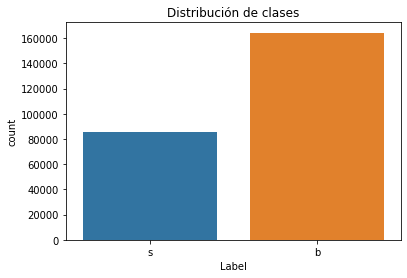

In [3]:
# Tamaño del dataset
print("Dimensiones del dataset:", df.shape)

# Tipos de datos y nulos
print("\nInformación general del dataset:")
df.info()

# Distribución de la variable objetivo
print("\nDistribución de la variable 'Label':")
print(df['Label'].value_counts())
sns.countplot(x='Label', data=df)
plt.title("Distribución de clases")
plt.show()


In [4]:
# Eliminar columna 'EventId' que no aporta al modelo
df = df.drop(columns=['EventId'])

# Convertir la variable objetivo 'Label' a valores binarios
df['Label'] = df['Label'].map({'s': 1, 'b': 0})

# Comprobar transformación
df['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

# Separar variables independientes y dependiente
X = df.drop('Label', axis=1)
y = df['Label']

# Escalado de las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Confirmar dimensiones
print("Shape X:", X_scaled.shape)
print("Shape y:", y.shape)

Shape X: (250000, 31)
Shape y: (250000,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import time

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')  # 'balanced' por el desbalanceo

# Métricas a evaluar
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score)
}


scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(f1_score))

# Resultados
print("Accuracy por fold:", np.round(scores * 100, 2))
print("F1-score por fold:", np.round(f1_scores * 100, 2))
print("Accuracy media:", round(np.mean(scores) * 100, 4), "%")
print("F1-score media:", round(np.mean(f1_scores) * 100, 4), "%")


[codecarbon INFO @ 09:35:20] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:35:20] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 09:35:20] 0.000033 kWh of electricity used since the beginning.


Accuracy por fold: [98.27 98.24 98.22 98.17 98.11]
F1-score por fold: [97.54 97.49 97.47 97.4  97.31]
Accuracy media: 98.202 %
F1-score media: 97.4426 %


Entrenamiento final con el 100% de los datos

In [7]:
from sklearn.metrics import accuracy_score, f1_score

# Entrenamiento con todo el conjunto
final_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
final_model.fit(X_scaled, y)

# Predicción sobre el mismo conjunto
y_pred = final_model.predict(X_scaled)

# Evaluación
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy sobre todo el dataset: {acc*100:.4f}%")
print(f"F1-score sobre todo el dataset: {f1*100:.4f}%")


[codecarbon INFO @ 09:35:35] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:35:35] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 09:35:35] 0.000067 kWh of electricity used since the beginning.


Accuracy sobre todo el dataset: 98.6148%
F1-score sobre todo el dataset: 98.0184%


División train/test y evaluación completa

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     32867
           1       0.95      1.00      0.97     17133

    accuracy                           0.98     50000
   macro avg       0.98      0.99      0.98     50000
weighted avg       0.98      0.98      0.98     50000

AUC-ROC: 0.9987


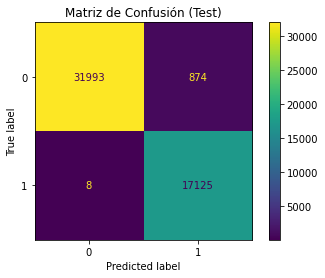

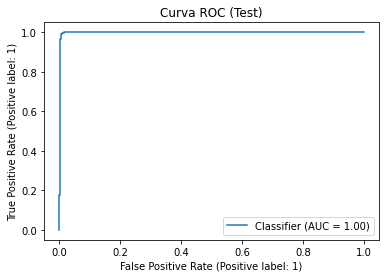

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# División en 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Entrenamiento en el 80%
model_eval = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
model_eval.fit(X_train, y_train)

# Predicciones sobre el 20% test
y_pred_test = model_eval.predict(X_test)
y_proba_test = model_eval.predict_proba(X_test)[:, 1]

# Métricas
print("Classification report:\n", classification_report(y_test, y_pred_test))
print("AUC-ROC:", round(roc_auc_score(y_test, y_proba_test), 4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matriz de Confusión (Test)")
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_proba_test)
plt.title("Curva ROC (Test)")
plt.show()


In [9]:
emissions = tracker.stop()
print(f"🌱 Emisiones estimadas: {emissions:.6f} kg de CO₂eq")


[codecarbon INFO @ 09:35:42] Energy consumed for RAM : 0.000031 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 09:35:42] Energy consumed for all CPUs : 0.000051 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 09:35:42] 0.000082 kWh of electricity used since the beginning.


🌱 Emisiones estimadas: 0.000014 kg de CO₂eq
